In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn. preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib. pyplot as plt
plt.style.use('fivethirtyeight' )
import fix_yahoo_finance as yf
import datetime
!pip install yahoofinancials
!pip install yfinance
from yahoofinancials import YahooFinancials
import yfinance as y

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=56e5aabcbd3e0afe0db9ff7b4a30e07f9475345de7eb01d8657ffa5000dd82e6
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
     |████████████████████████████████| 6.3 MB 12.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=30a07f1a32b54f83c29556d704b0066520fa47efd8c0b87eb36d603136c045b5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
#get the stock quote
msft = y.Ticker("MSFT")
df = msft.history(period="1000d")

In [3]:
df.shape

(1000, 7)

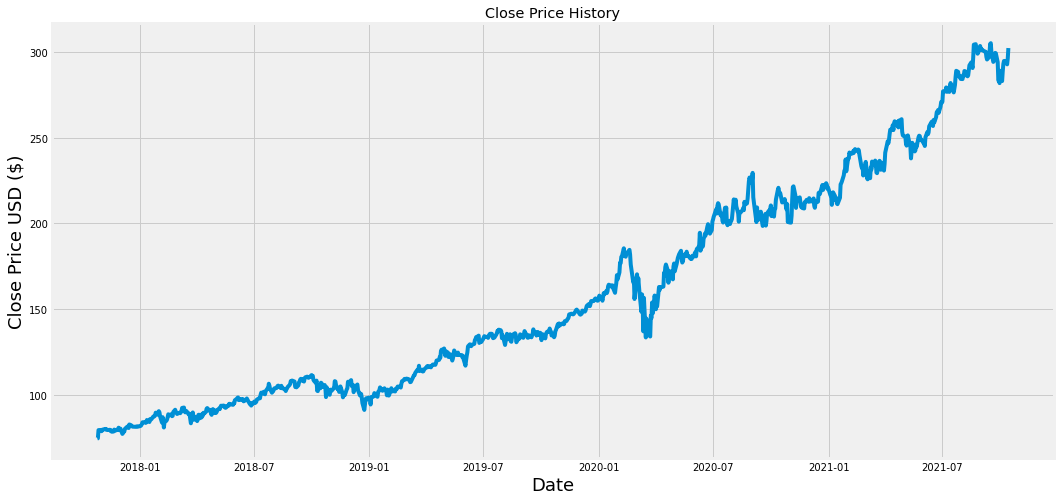

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History' )
plt.plot (df[ 'Close'])
plt.xlabel( 'Date' , fontsize=18)
plt.ylabel( 'Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with only the Close column
data = df.filter (['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )
training_data_len

800

In [6]:
#Scale the data
scaler = MinMaxScaler( feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [5.33853960e-04],
       [2.12735380e-02],
       [2.16020711e-02],
       [1.86861452e-02],
       [1.86861452e-02],
       [2.22591044e-02],
       [2.26287744e-02],
       [2.39840108e-02],
       [2.31626614e-02],
       [2.43536148e-02],
       [2.24233544e-02],
       [2.15199626e-02],
       [2.17663542e-02],
       [2.22591044e-02],
       [1.95763096e-02],
       [2.04842648e-02],
       [1.71823331e-02],
       [1.77188325e-02],
       [2.26306924e-02],
       [2.01128752e-02],
       [2.07320122e-02],
       [2.32497632e-02],
       [2.74184140e-02],
       [2.10622318e-02],
       [2.44880372e-02],
       [2.48594268e-02],
       [1.17340730e-02],
       [1.38390991e-02],
       [1.87507936e-02],
       [1.75537888e-02],
       [2.44467350e-02],
       [2.88630670e-02],
       [3.03077531e-02],
       [2.93584626e-02],
       [2.66342995e-02],
       [3.55496341e-02],
       [3.36096517e-02],
       [3.13395819e-02],
       [3.00601049e-02],


In [7]:
#Create the training data set
# create the scaled training data set
train_data=scaled_data[0:training_data_len , :]
#Split the data into x train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()


[array([0.        , 0.00053385, 0.02127354, 0.02160207, 0.01868615,
       0.01868615, 0.0222591 , 0.02262877, 0.02398401, 0.02316266,
       0.02435361, 0.02242335, 0.02151996, 0.02176635, 0.0222591 ,
       0.01957631, 0.02048426, 0.01718233, 0.01771883, 0.02263069,
       0.02011288, 0.02073201, 0.02324976, 0.02741841, 0.02106223,
       0.02448804, 0.02485943, 0.01173407, 0.0138391 , 0.01875079,
       0.01755379, 0.02444673, 0.02886307, 0.03030775, 0.02935846,
       0.0266343 , 0.03554963, 0.03360965, 0.03133958, 0.0300601 ,
       0.0299775 , 0.03001874, 0.02956481, 0.03084429, 0.03088555,
       0.03014264, 0.03183491, 0.03348588, 0.03662277, 0.04108043,
       0.04145195, 0.04120427, 0.03955334, 0.04062641, 0.04690025,
       0.04174081, 0.04912905, 0.04896387, 0.04855111, 0.05519638])]
[0.056393483172224756]



In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(740, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train. shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error' )

In [12]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

740/740 [==============================] - 20s 24ms/step - loss: 0.0013


In [13]:
#Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset [training_data_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array

x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [16]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


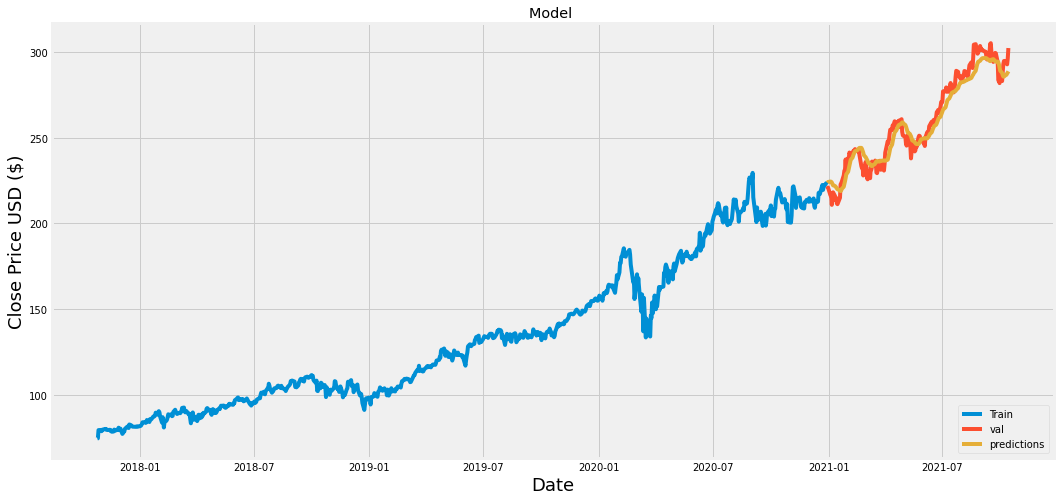

In [17]:
#Plot the data
train = data[ : training_data_len]
valid = data[training_data_len: ]
valid[ 'Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title( 'Model ')
plt.xlabel( 'Date', fontsize=18)
plt.ylabel( 'Close Price USD ($)', fontsize=18)
plt.plot(train[ 'Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend([ 'Train','val','predictions'],loc='lower right')
plt.show()


In [18]:
valid

,Close,Predictions
Date,,
2020-12-30,220.239441,223.744354
2020-12-31,220.974640,224.203293
2021-01-04,216.275391,224.508530
2021-01-05,216.484009,224.331223
2021-01-06,210.870728,223.920868
...,...,...
2021-10-08,294.850006,286.139191
2021-10-11,294.230011,286.826691
2021-10-12,292.880005,287.541046


In [19]:
#Get the quote
msft = y.Ticker("MSFT")
dataf = msft.history(period="1000d")
#Create a new dataframe
new_df =dataf.filter([ 'Close' ])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60: ].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price =scaler.inverse_transform(pred_price)
print(pred_price)

[[290.02164]]


In [21]:
dataf2 = msft.history(period="d")


In [22]:
print(dataf2['Close'])

Date
2021-10-14    303.140015
Name: Close, dtype: float64
